# VB04 - Simple linear regression 
# Stan - _Automatic Differentiation Variational Inference (ADVI)_

# _Josep Fortiana_  $\mskip100mu$ 2022-05-16

****
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\cP{\cal P}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{P}$
$\def\R{\mathbb{R}}$ 
$\def\stilde{\tilde{s}}$ 
$\def\sqtilde{\tilde{s}{}^{2}}$ 
$\def\tdist{\operatorname{t}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

# 01. Simple linear regression: A simulated example

## Generate a simulated dataset for simple linear regression

In [1]:
# More or less arbitrary parameters for the data generation
trueA<-1   
trueB<-5
trueSd<-15
sampleSize<-20 # 
n<-sampleSize 

In [2]:
# Uniformly spread x values in the interval [-n/2,n/2]
x<-(-(sampleSize-1)/2):((sampleSize-1)/2)
# y values of the form a + b*x + N(0,trueSd)
set.seed(123123)
y<-trueA+trueB*x+rnorm(n=sampleSize,mean=0,sd=trueSd)

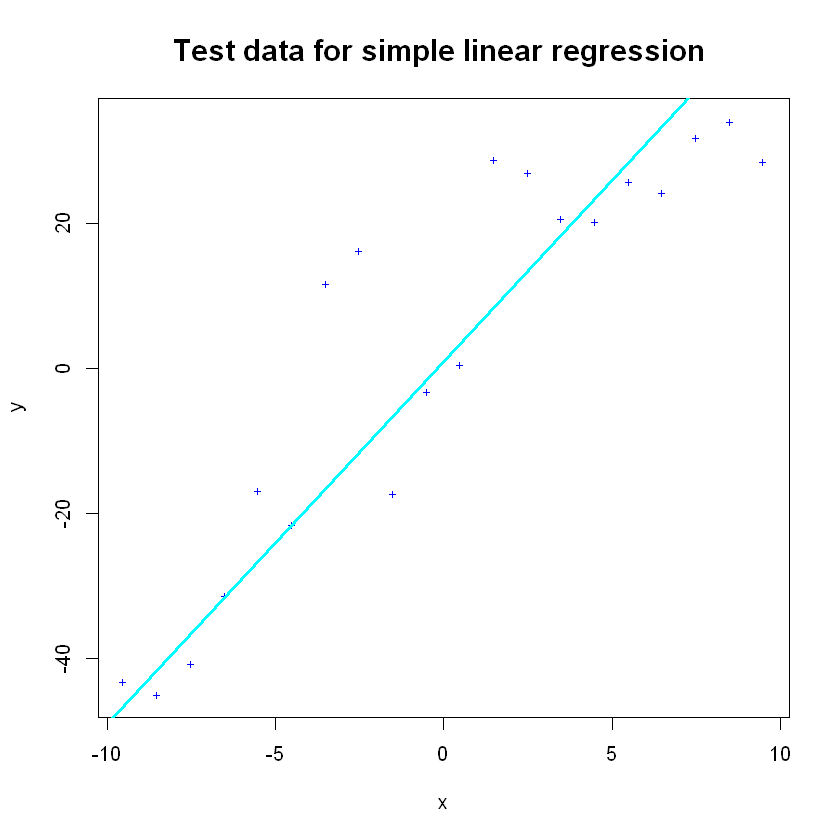

In [3]:
# Plot data points plus the line used in the generation
# Note this line is NOT a regression line, which will be computed below
options(repr.plot.width=7, repr.plot.height=7)
plot(x,y,pch='+',cex=0.8,col="blue",main="Test data for simple linear regression ",cex.main=1.5)
abline(trueA,trueB,lwd=3.0,col="cyan")

## Fit a least squares linear regression model

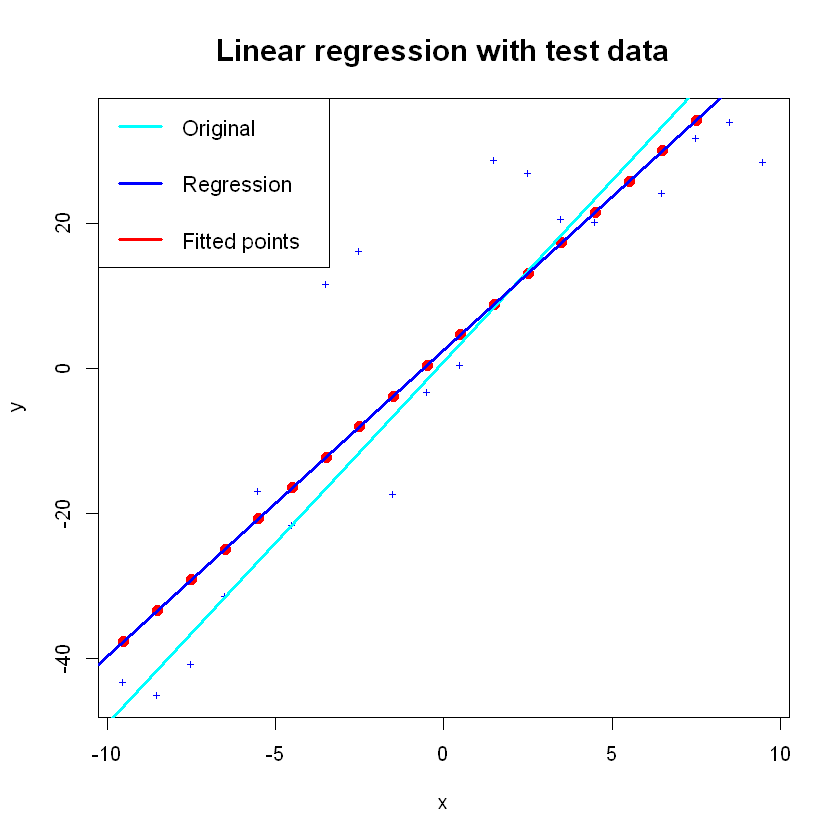

In [4]:
lm.1<-lm(y~x)
options(repr.plot.width=7, repr.plot.height=7)
plot(x,y,pch='+',cex=0.8,col="blue",main="Linear regression with test data",cex.main=1.5)
yhat<-fitted.values(lm.1)
points(x,yhat,pch=16,col="red",cex=1.2)
abline(trueA,trueB,lwd=3.0,col="cyan")
abline(lm.1,lwd=3.0,col="blue")
legend("topleft",c("Original    ","","Regression   ","","Fitted points"), lwd=2.5,
       col=c("cyan","white","blue","white","red"),cex=1.1)

### Extract information from the fitted model

In [5]:
print(lm.1)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      2.507        4.222  



In [6]:
S<-summary(lm.1)
S


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.140  -5.951  -3.854   3.507  24.248 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.5066     2.6939   0.930    0.364    
x             4.2224     0.4672   9.038 4.13e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.05 on 18 degrees of freedom
Multiple R-squared:  0.8194,	Adjusted R-squared:  0.8094 
F-statistic: 81.69 on 1 and 18 DF,  p-value: 4.135e-08


### Regression coefficients

In [7]:
Coeff<-coefficients(lm.1)
a.hat<-Coeff[1]
b.hat<-Coeff[2]
round(a.hat,3)
round(b.hat,3)

(Intercept) 
      2.507

x 
4.222

# 02. Simple linear regression: Bayesian model

The purpose of fitting a model in this case is to explore the relationship between $y$ and $x$. Since both $y$ and $x$ are continuous, a simple regression line is a good start.

Each observed response ($y_{i}$) is assumed to be drawn from a normal distribution with mean ($\mu_{i}$) and standard deviation ($\sigma$). 

The expected values ($\mu_{i}$) are themselves determined by the linear predictor ($\beta_{0}+\beta\cdot x_{i}$). In this case, $\beta_{0}$ represents the $y$-intercept (value of $y$ when $x$ is equal to zero) and $\beta$ represents the rate of change in $y$ for every unit change in $x$ (the effect).

We will employ weakly informative _("non informative")_ priors. This choice is always a bit of a balancing act. If the priors are too vague (wide) the MCMC sampler can wander off into nonsense areas of likelihood rather than concentrate around areas of highest likelihood (desired when wanting the outcomes to be largely driven by the data). On the other hand, if the priors are too strong, they may have an influence on the parameters. In such a simple model, this balance is very forgiving - it is for more complex models that prior choice becomes more important.

For this simple model, we will go with Gaussian (normal) priors with relatively large standard deviations (100) for both the intercept and the treatment effect and a wide uniform for the standard deviation. 
The intercept $\beta_{0}$  will be centered either at $\hat{a}$ (`a.hat`), the least squares intercept or at zero, and the slope will be zero centered. Alternatively we could center $x$ and $y$ beforehand and then use a zero-centered prior for  $\beta_{0}$ too.

The model, likelihood $+$ priors, is:

$$
\begin{array}{lcllcl}
    y_{i}     &\sim &\normaldist(\mu_{i},\sigma^2),\\[0.2cm]
    \mu_{i}   &=    &\beta_{0}+\beta\cdot x_{i},\\[0.2cm]
    \beta_{0} &\sim &\normaldist(\,\hat{a}\,,100^2), \mskip40mu\text{or }\mskip40mu\beta_{0} &\sim &\normaldist(\,0\,,100^2),\\[0.2cm]
    \beta     &\sim &\normaldist(0,100^2),\\[0.2cm]
    \sigma    &\sim &\unifdist(0,100).
\end{array}
$$

Alternative priors for the regression coefficients are $\cauchydist (0,\,\cdot\,)$ distributions, as sugggested by Gelman et al (2008).

Andrew Gelman, Aleks Jakulin, Maria Grazia Pittau, Yu-Sung Su (2008), [A weakly informative default prior distribution for logistic and other regression models, Ann. Appl. Stat. 2(4): 1360-1383.](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-2/issue-4/A-weakly-informative-default-prior-distribution/10.1214/08-AOAS191.full)

There the authors suggest $\cauchydist (0,s)$, with a scale parameter $s=2.5$.

# Stan implementation

In [8]:
#install.packages("rstan", repos= "https://cloud.r-project.org")
options(mc.cores = parallel::detectCores())
require(rstan,quietly=TRUE)
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=corei7 -mtune=corei7')


rstan version 2.26.11 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file



In [9]:
#install.packages("bayesplot",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(bayesplot,quietly=TRUE)
color_scheme_set("brightblue")

This is bayesplot version 1.9.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [10]:
simple.regression.stan.model<-"
    data{
    real a_hat;
    int<lower=1> n;
    vector[n] x; 
    vector[n] y; 
    }
    parameters{
    real a;
    real b;
    real<lower=0> sigma;
    }
    model{ 
        vector[n] y_hat;
        y_hat=a+b*x; 

        // Prior 
        a~normal(a_hat,100);
        b~normal(0,100); 
        sigma~uniform(0,100);

        // Likelihood   
        y~normal(y_hat,sigma);
    }
"

In [11]:
# Translate model to C++ and compile to DSO:
simple.regression.stanDso <- stan_model(model_code=simple.regression.stan.model) 

## MCMC sampling

In [12]:
simple.regression.stan.dat<-list(y = y, x = x, n = sampleSize, a_hat=a.hat)

In [13]:
# Generate posterior sample:
simple.regression.stan.m1<-sampling(simple.regression.stanDso,
                                    data=simple.regression.stan.dat,chains=3,iter=20000,warmup=2500,thin=5)

In [14]:
print(simple.regression.stan.m1)

Inference for Stan model: anon_model.
3 chains, each with iter=20000; warmup=2500; thin=5; 
post-warmup draws per chain=3500, total post-warmup draws=10500.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
a       2.53    0.03 2.99  -3.44   0.62   2.53   4.44   8.31 10049    1
b       4.22    0.00 0.51   3.22   3.90   4.23   4.55   5.25 10718    1
sigma  12.98    0.02 2.44   9.25  11.26  12.65  14.28  18.59 10519    1
lp__  -57.92    0.01 1.37 -61.49 -58.53 -57.56 -56.92 -56.39 10297    1

Samples were drawn using NUTS(diag_e) at Sun May 15 09:08:13 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [15]:
summary(simple.regression.stan.m1)$summary

mean       se_mean     sd       2.5%       25%         50%       
a       2.525041 0.029780875 2.985371  -3.442459   0.6222218   2.530674
b       4.224986 0.004921147 0.509465   3.223030   3.8985531   4.229650
sigma  12.980081 0.023801927 2.441134   9.247997  11.2644774  12.645139
lp__  -57.919384 0.013484514 1.368313 -61.490487 -58.5347386 -57.555412
      75%        97.5%      n_eff    Rhat     
a       4.443229   8.314269 10048.97 0.9998015
b       4.547581   5.249143 10717.57 0.9997913
sigma  14.278561  18.586937 10518.63 1.0002078
lp__  -56.924435 -56.386630 10296.76 0.9997864

#### Compare to the least squares solution

In [16]:
coefficients(S)
sigma(lm.1)

Estimate Std. Error t value   Pr(>|t|)    
(Intercept) 2.506649 2.6938789  0.9304981 3.644257e-01
x           4.222449 0.4671779  9.0382039 4.134917e-08

[1] 12.04739

## Diagnostic plots

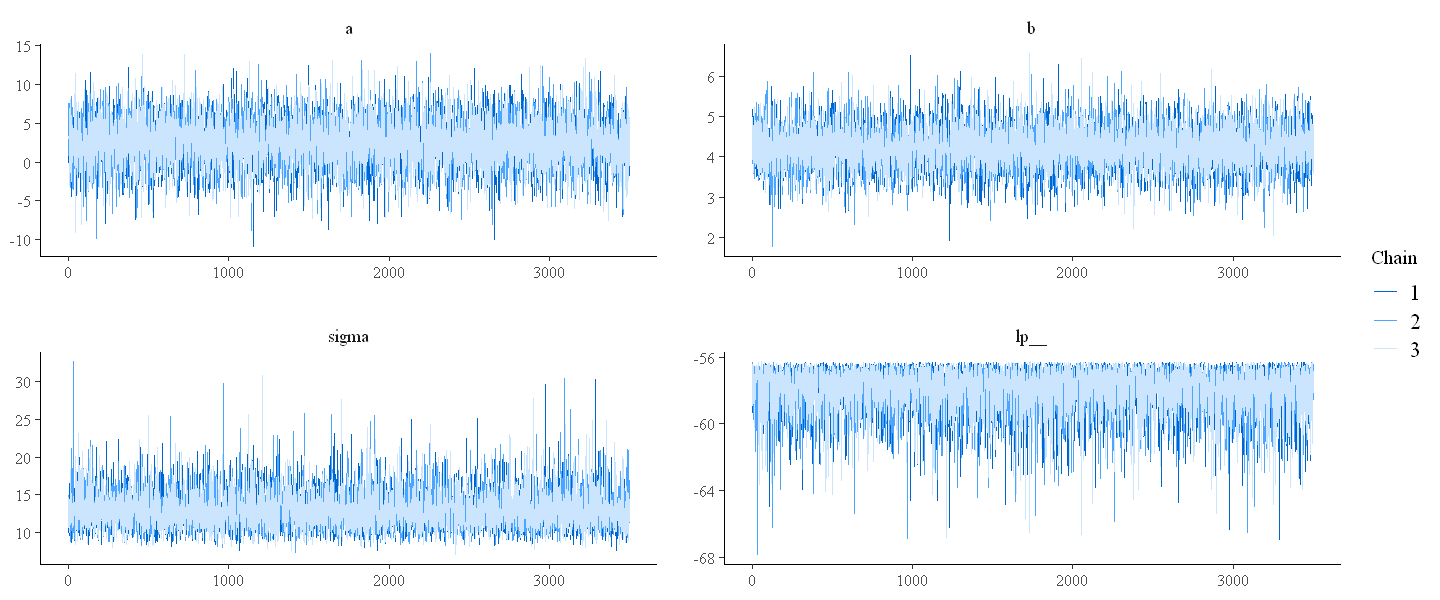

In [17]:
options(repr.plot.width=12, repr.plot.height=5)
mcmc_trace(simple.regression.stan.m1)

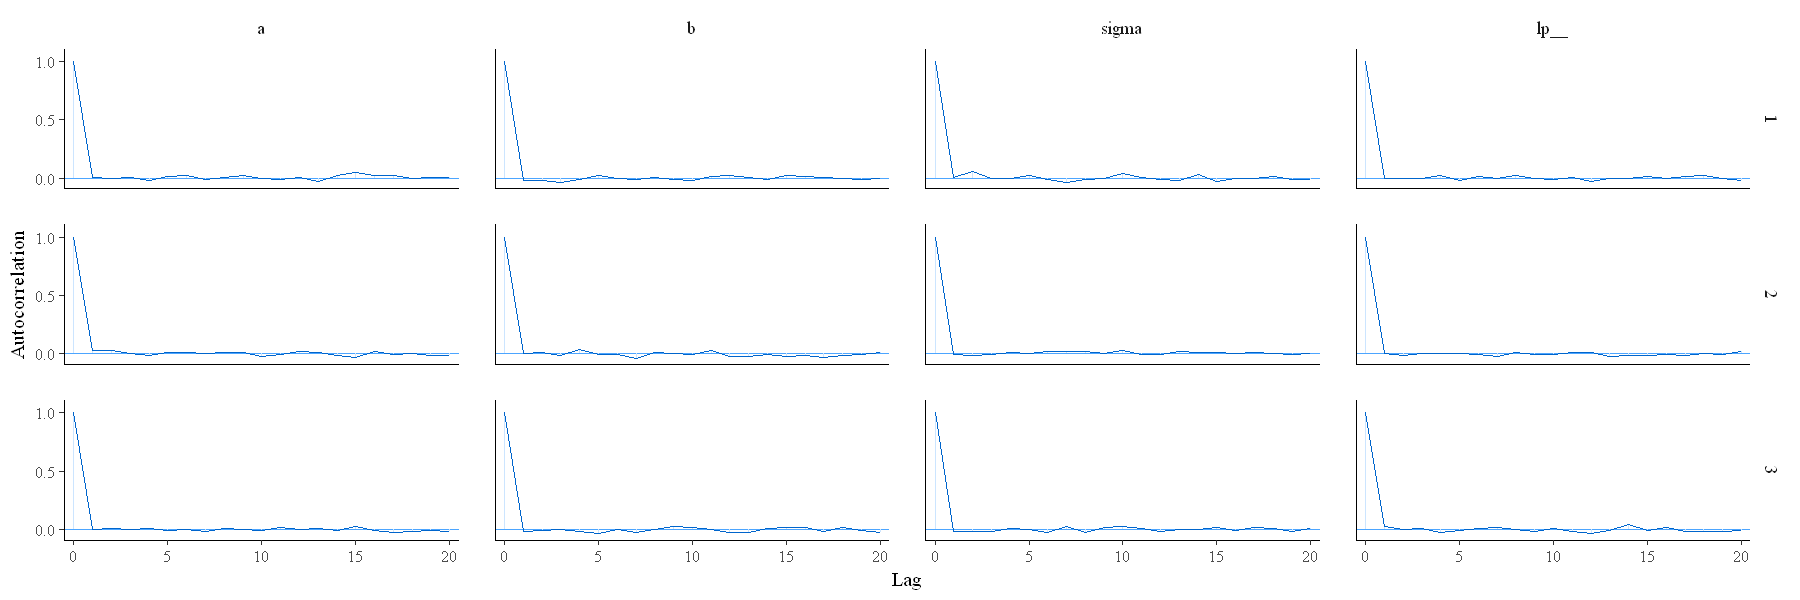

In [18]:
options(repr.plot.width=15, repr.plot.height=5)
mcmc_acf(simple.regression.stan.m1)

## Summary plots

In [19]:
#simple.regression.stan.m1.mcmc<-As.mcmc.list(simple.regression.stan.m1)

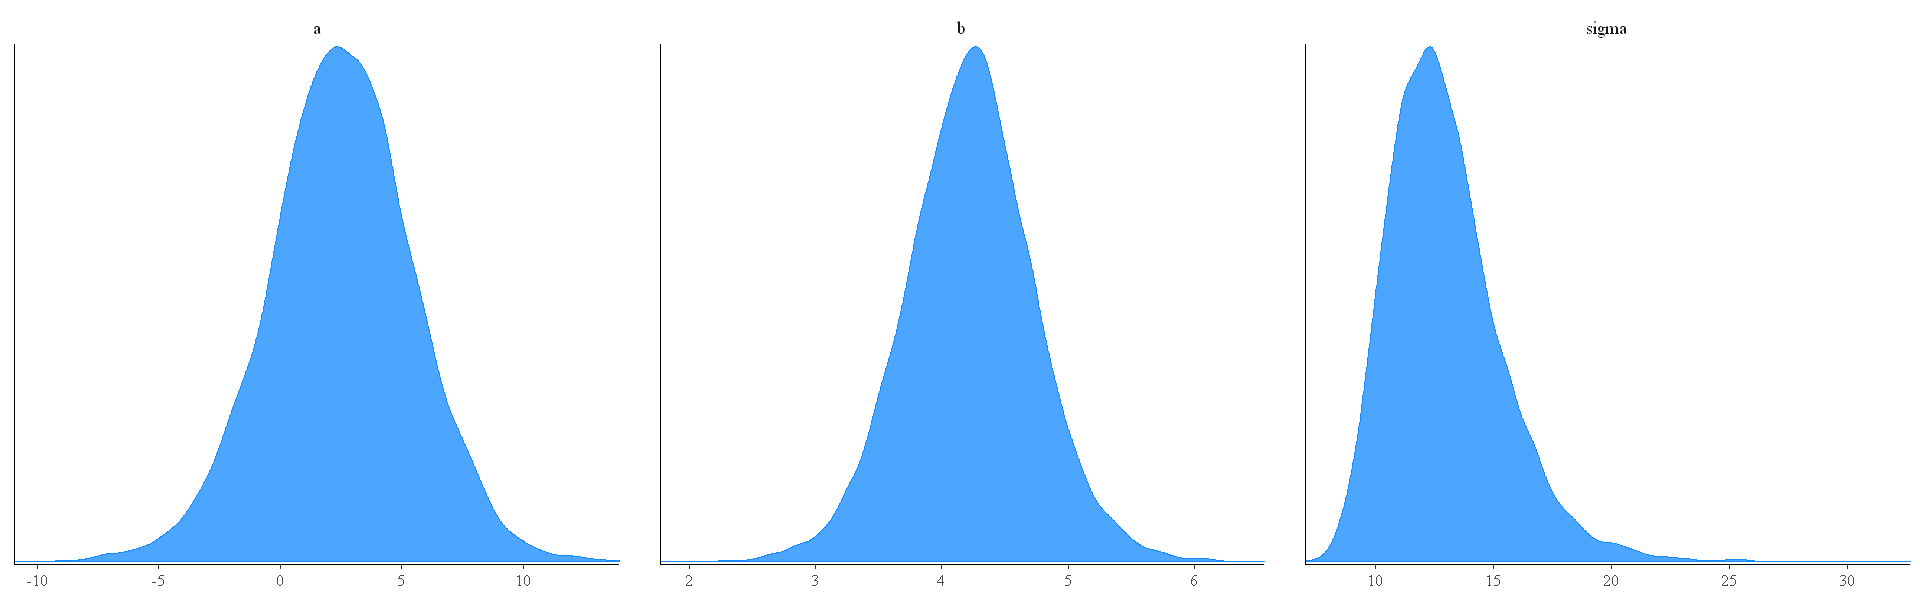

In [19]:
options(repr.plot.width=16, repr.plot.height=5)
mcmc_dens(simple.regression.stan.m1,pars=c("a","b","sigma"))

In [20]:
options(repr.plot.width=9, repr.plot.height=6)
mcmc_areas(simple.regression.stan.m1,pars=c("a","sigma"))

In [21]:
options(repr.plot.width=5, repr.plot.height=5)
mcmc_areas(simple.regression.stan.m1,pars=c("b"))

# Sample from the Stan model using Variational inference

In [22]:
simple.regression.stan.dat<-list(y = y, x = x, n = sampleSize, a_hat=a.hat)

In [25]:
simple.regression.stan.vb<-vb(simple.regression.stanDso,data=simple.regression.stan.dat,iter=20000,
                              output_samples=100000,tol_rel_obj=0.00001)

Chain 1: ------------------------------------------------------------
Chain 1: EXPERIMENTAL ALGORITHM:
Chain 1:   This procedure has not been thoroughly tested and may be unstable
Chain 1:   or buggy. The interface is subject to change.
Chain 1: ------------------------------------------------------------
Chain 1: 
Chain 1: 
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Begin eta adaptation.
Chain 1: Iteration:   1 / 250 [  0%]  (Adaptation)
Chain 1: Iteration:  50 / 250 [ 20%]  (Adaptation)
Chain 1: Iteration: 100 / 250 [ 40%]  (Adaptation)
Chain 1: Iteration: 150 / 250 [ 60%]  (Adaptation)
Chain 1: Iteration: 200 / 250 [ 80%]  (Adaptation)
Chain 1: Success! Found best value [eta = 1] earlier than expected.
Chain 1: 
Chain 1: Begin stochastic gradient ascent.
Chain 1:   iter             ELBO   delta_ELBO_mean 

In [25]:
#str(simple.regression.stan.vb)

In [26]:
print(simple.regression.stan.vb)

Inference for Stan model: anon_model.
1 chains, each with iter=100000; warmup=0; thin=1; 
post-warmup draws per chain=100000, total post-warmup draws=100000.

       mean se_mean   sd  2.5%   25%   50%   75% 97.5% n_eff khat
a      2.57     NaN 2.82 -2.97  0.66  2.57  4.47  8.07   NaN 0.56
b      4.27     NaN 0.51  3.27  3.92  4.26  4.61  5.26   NaN 0.56
sigma 13.00     NaN 2.20  9.22 11.44 12.82 14.37 17.82   NaN 0.55
lp__   0.00     NaN 0.00  0.00  0.00  0.00  0.00  0.00   NaN 0.55

Approximate samples were drawn using VB(meanfield) at Sun May 15 09:11:47 2022.


We recommend genuine 'sampling' from the posterior distribution for final inferences!



In [27]:
summary(simple.regression.stan.vb)$summary

mean      se_mean sd        2.5%      25%        50%       75%      
a      2.565484 NaN     2.8202111 -2.970996  0.6561663  2.567740  4.466880
b      4.265315 NaN     0.5081356  3.268588  3.9231475  4.264355  4.609307
sigma 12.999450 NaN     2.1978988  9.215312 11.4368750 12.819300 14.367175
lp__   0.000000 NaN     0.0000000  0.000000  0.0000000  0.000000  0.000000
      97.5%     n_eff khat     
a      8.073551 NaN   0.5587112
b      5.260941 NaN   0.5564927
sigma 17.819703 NaN   0.5517796
lp__   0.000000 NaN   0.5505174

## Summary plots

In [28]:
options(repr.plot.width=16, repr.plot.height=5)
mcmc_dens(simple.regression.stan.vb,pars=c("a","b","sigma"))

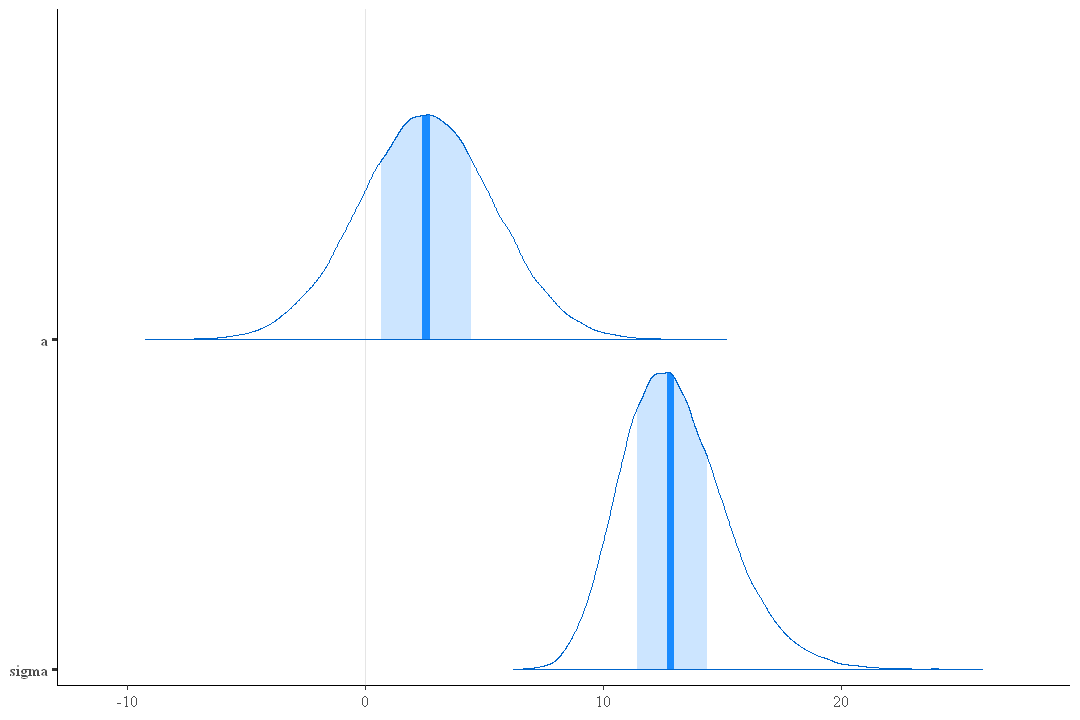

In [29]:
options(repr.plot.width=9, repr.plot.height=6)
mcmc_areas(simple.regression.stan.vb,pars=c("a","sigma"))

In [30]:
options(repr.plot.width=5, repr.plot.height=5)
mcmc_areas(simple.regression.stan.vb,pars=c("b"))